### Kaggle Titanic Competition


Import libraries

In [1]:
#eda
import numpy as np                               
import pandas as pd  
import matplotlib.pyplot as plt                             
import seaborn as sns
import random

#ml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import confusion_matrix

## EDA

In [2]:
titanic = pd.read_csv('data/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic['Age'].mean()

29.69911764705882

In [8]:
titanic['Age'].fillna('30.0', inplace=True)

In [9]:
print(titanic['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: object


In [10]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Survived column is the target, this column is indicating if the person survived (1) or deceased (0)

### Seeing 1st correlation

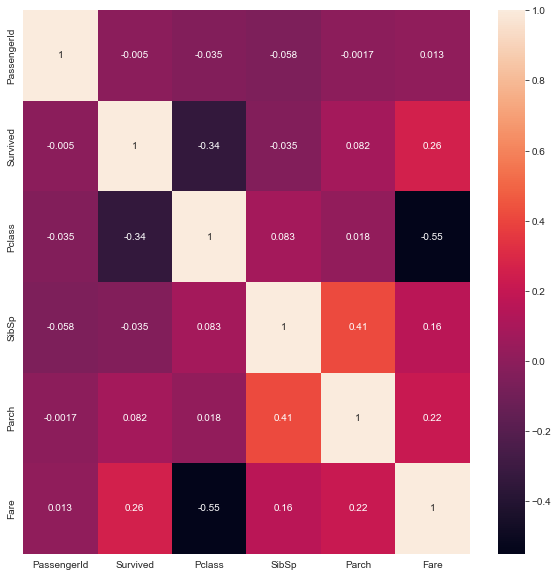

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.heatmap(titanic.corr(), annot=True);

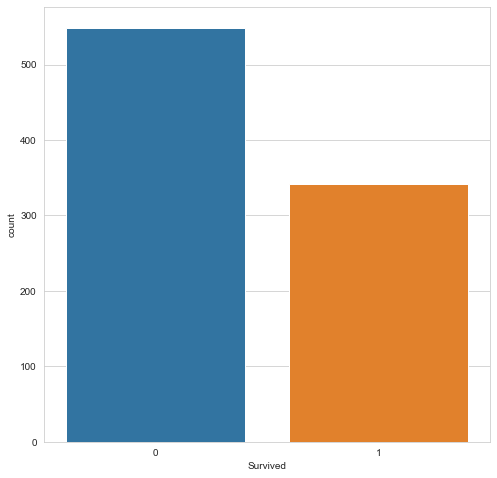

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(x="Survived",data=titanic)
plt.show()

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#convert Nulls to N/A

titanic['Cabin'].fillna('N/A', inplace = True)


As the nulls are a high number, instead of removing we just put N/A in order to be able to explore the CABIN to help us to make predictions

In [15]:
#confirmed the numbers os N/As
titanic['Cabin'].value_counts()

N/A            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [16]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
#Embarked there is only two null values, so we should fill both values with the mode

titanic['Embarked'].fillna((titanic['Embarked'].mode()[0]), inplace = True)

In [18]:
#confirming there is 0 non-null values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


Checking how many values we have under 0 in the column Age

In [19]:
titanic = titanic.astype({"Age": float}, errors='raise')

In [20]:
valores = titanic['Age'].values

count = []
for i in valores:
    if i < 18:
        count.append(i)


In [21]:
numbers_under18 = pd.DataFrame(count)

In [22]:
numbers_under18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       113 non-null    float64
dtypes: float64(1)
memory usage: 1.0 KB


113 individuals under 18

In [23]:
titanic['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

### We need to change to Female = 0 and Male = 1

In [24]:
titanic['Sex'] = titanic['Sex'].apply(lambda x: 0 if x == 'female' else 1 )

In [25]:
titanic = pd.get_dummies(titanic, columns=['Embarked'])

In [26]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N/A,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,N/A,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,N/A,0,0,1


In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(3)
memory usage: 79.3+ KB


Removins all uninteresting (string) features before encoding

In [29]:
titanic = titanic.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [30]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0,0,1
887,888,1,1,0,19.0,0,0,30.0000,0,0,1
888,889,0,3,0,30.0,1,2,23.4500,0,0,1
889,890,1,1,1,26.0,0,0,30.0000,1,0,0


In [31]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

### Adjustments Test Data

In [32]:
titanic_test = pd.read_csv('data/test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
titanic_test['Sex'] = titanic_test['Sex'].apply(lambda x: 0 if x == 'female' else 1 )

In [34]:
titanic_test = titanic_test.astype({"Age": float}, errors='raise')

In [35]:
titanic_test['Embarked'].fillna((titanic_test['Embarked'].mode()[0]), inplace = True)

In [36]:
titanic_test['Cabin'].fillna('N/A', inplace = True)

In [37]:
titanic_test['Age'].fillna('30.0', inplace=True)

In [38]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,N/A,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,N/A,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,N/A,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,N/A,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,N/A,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.0,0,0,A.5. 3236,8.0500,N/A,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,N/A,S
416,1308,3,"Ware, Mr. Frederick",1,30.0,0,0,359309,8.0500,N/A,S


In [39]:
titanic_test['Fare'].mean()

35.627188489208635

In [40]:
titanic_test['Fare'].fillna('35.62', inplace=True)

In [41]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    object
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    object
 9   Cabin        418 non-null    object
 10  Embarked     418 non-null    object
dtypes: int64(5), object(6)
memory usage: 36.0+ KB


We can see that 'Embarked' is categorical, we can use get_dummies() in order to change

In [42]:
titanic_test = pd.get_dummies(titanic_test, columns=['Embarked'])

In [43]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,N/A,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0,N/A,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,N/A,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,N/A,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,N/A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.0,0,0,A.5. 3236,8.05,N/A,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9,C105,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.25,N/A,0,0,1
416,1308,3,"Ware, Mr. Frederick",1,30.0,0,0,359309,8.05,N/A,0,0,1


In [44]:
titanic_test = titanic_test.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [45]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [46]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

ML Models

In [47]:
training = titanic

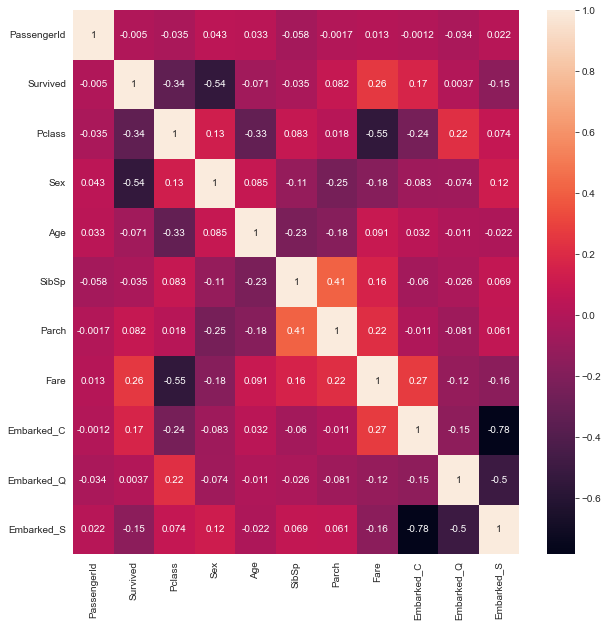

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.heatmap(training.corr(), annot=True);

In [49]:
#Identifying columns and target

X = training[["Pclass","Parch", "SibSp", "Fare", "Age", "Sex", 'Embarked_C', 'Embarked_Q','Embarked_S']]
y = training['Survived']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state=42)

In [51]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 712
X_test 179
y_train 712
y_test 179


In [52]:
log_clf = LogisticRegression(random_state=42) # Mezcla los datos
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42) # Se usa en combinación con otro arg
svm_clf = SVC(gamma="scale", random_state=42, probability=True)
gdb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
dcs_clf = DecisionTreeClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)
knb_clf = KNeighborsClassifier(n_neighbors=3)
bag_clf = BaggingClassifier(
                            n_estimators=500, # Cantidad de árboles
                            max_samples=100, # Muestras utilizadas en boostrapping
                            bootstrap=True, # Usamos boostrapping
                            # max_features = 3 # Features que utiliza en el boostrapping. Cuanto más bajo, mejor generalizará y menos overfitting
                            random_state=42)
ada_clf = AdaBoostClassifier(n_estimators=200,
                             learning_rate=0.5,
                             random_state=42)


estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('gdb', gdb_clf), 
            ('dcs', dcs_clf), ('xgb', xgb_clf), ('knb', knb_clf),('bag', bag_clf), ('ada', ada_clf)]

voting_clf = VotingClassifier(estimators=estimators, voting='hard')

In [53]:
# Train the model
voting_clf.fit(X_train, y_train)

c:\Users\hugom\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('gdb',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         max_depth=1,
                                                         random_state=0)),
                             ('dcs', DecisionTreeClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callba...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                         

In [54]:
for clf in (log_clf, rnd_clf, svm_clf,gdb_clf, dcs_clf, xgb_clf, dcs_clf, bag_clf, ada_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

c:\Users\hugom\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression 0.7988826815642458
RandomForestClassifier 0.8324022346368715
SVC 0.659217877094972
GradientBoostingClassifier 0.8268156424581006
DecisionTreeClassifier 0.770949720670391
XGBClassifier 0.7932960893854749
DecisionTreeClassifier 0.770949720670391
BaggingClassifier 0.8100558659217877
AdaBoostClassifier 0.7988826815642458


c:\Users\hugom\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier 0.8212290502793296


Confusion Matrix

In [55]:
c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[93, 12],
       [20, 54]], dtype=int64)

<AxesSubplot:>

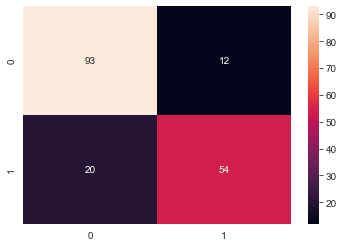

In [56]:
sns.heatmap(c_mat, annot=True)

Train

In [57]:
training

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0,0,1
887,888,1,1,0,19.0,0,0,30.0000,0,0,1
888,889,0,3,0,30.0,1,2,23.4500,0,0,1
889,890,1,1,1,26.0,0,0,30.0000,1,0,0


Test

In [58]:
titanic_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,0,1,0
1,893,3,0,47.0,1,0,7.0,0,0,1
2,894,2,1,62.0,0,0,9.6875,0,1,0
3,895,3,1,27.0,0,0,8.6625,0,0,1
4,896,3,0,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30.0,0,0,8.05,0,0,1
414,1306,1,0,39.0,0,0,108.9,1,0,0
415,1307,3,1,38.5,0,0,7.25,0,0,1
416,1308,3,1,30.0,0,0,8.05,0,0,1


# Make prediction

In [59]:
X = titanic_test[["Pclass","Parch", "SibSp", "Fare", "Age", "Sex", 'Embarked_C', 'Embarked_Q','Embarked_S']]

X.shape

(418, 9)

In [60]:
predictions_submit = gdb_clf.predict(X)
predictions_submit

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Kaggle submission

In [61]:
sample = pd.read_csv("data/gender_submission.csv")

In [62]:
sample.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [63]:
submission = pd.DataFrame({"PassengerId": sample['PassengerId'],"Survived": predictions_submit})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [64]:
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [65]:
sample.shape

(418, 2)

In [66]:
sample.columns

Index(['PassengerId', 'Survived'], dtype='object')

# Chequeator

In [67]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.PassengerId.all() == sample.PassengerId.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nSecret message: Cannot believe that after preparing this jupyter notebook you have changed something related to the rows in the test file. Cry.")

In [68]:
chequeator(submission)

You're ready to submit!


NameError: name 'urllib' is not defined

In [69]:
#solution_hm2 = submission.to_csv('solution_hm2.csv', index=False)